In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Import the Label Encoder
from sklearn.preprocessing import LabelEncoder
import re

In [4]:
df=pd.read_csv("/SPAM text message 20170820 - Data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **EDA**

In [5]:
# Display firt five rows
display(df.head())

# Display the summary statistics
display(df.describe())

# Print the info
print(df.info())

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


# Checking if the category data is balanced or not.

In [6]:

print(df['Category'].value_counts())

print()
print(df['Category'].value_counts(normalize=True))



Category
ham     4825
spam     747
Name: count, dtype: int64

Category
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


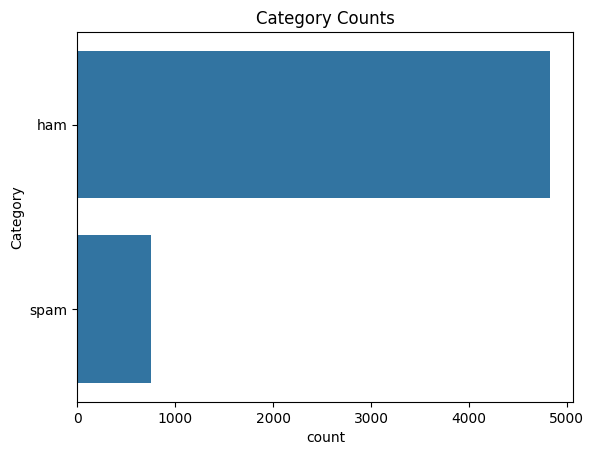

In [7]:
# Visualize the Categories
sns.countplot(df['Category'])
plt.title("Category Counts")
plt.show()

### encode the labels

In [8]:
# Initialize the Label Encoder.
label_encoder = LabelEncoder()

# Encode the categories
X_encoded = label_encoder.fit_transform(df['Message'])

# Display the first five rows again to see the result
display(df.head())

# Print the datatypes
print(df.dtypes)



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Category    object
Message     object
dtype: object


In [9]:
X_encoded

array([1080, 3126,  999, ..., 3313, 3932, 3437])

### Feature engineering (NLP)

i will count words in each message and compare them before building the model

Category
ham     14.310259
spam    23.812584
Name: word_count, dtype: float64


<ipython-input-10-9dfaff9bbe08>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']=='spam']['word_count'], label='Spam')
<ipython-input-10-9dfaff9bbe08>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Category']=='ham']['word_count'], label='Ham'),


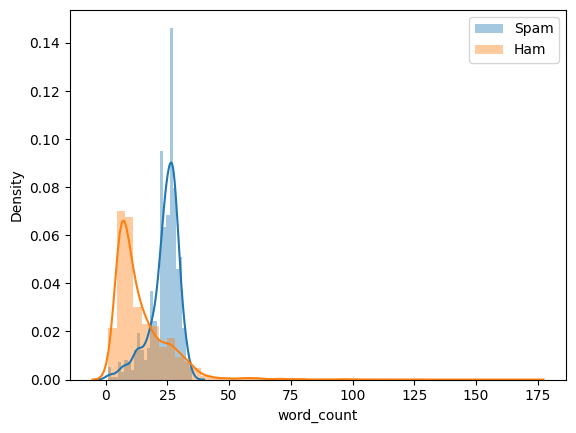

In [10]:

df['word_count'] = df['Message'].str.split().str.len()
print(df.groupby('Category')['word_count'].mean())

# Visualize the distribution of word counts in each category
sns.distplot(df[df['Category']=='spam']['word_count'], label='Spam')
sns.distplot(df[df['Category']=='ham']['word_count'], label='Ham'),
plt.legend()
plt.show()

### There some non-alphanumeric characters ( * ' " - ) and stop words like a, and, the etc. Let's discard them

In [11]:
df['Message'] = df['Message'].str.replace('"', '').str.replace("'", '')

In [12]:

# Check if there are quotes in the 'message' column
def check_quotes(message):
    return '"' in message or "'" in message

df['has_quotes'] = df['Message'].apply(check_quotes)



In [13]:
# Check for missing values in the 'message' column
if df['Message'].isnull().any():
    print("There are missing values in the 'message' column.")
else:
    print("No missing values in the 'message' column.")

No missing values in the 'message' column.


###  preprocessing(NLP)

In [14]:
# Basic preprocessing for Naive Bayes
def preprocess_message(message):
    # Convert to lowercase
    message = message.lower()
    # Remove special characters
    message = re.sub(r'\W', ' ', message)
    # Remove single characters
    message = re.sub(r'\s+[a-zA-Z]\s+', ' ', message)
    # Remove single characters from the start
    message = re.sub(r'\^[a-zA-Z]\s+', ' ', message)
    # Substitute multiple spaces with single space
    message = re.sub(r'\s+', ' ', message, flags=re.I)
    return message

df['processed_message'] = df['Message'].apply(preprocess_message)

print("Messages have been preprocessed and are ready for building the Naive Bayes model.")


Messages have been preprocessed and are ready for building the Naive Bayes model.


In [15]:
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [16]:
df.head()

,Category,Message,word_count,has_quotes,processed_message
0,0,"Go until jurong point, crazy.. Available only ...",20,False,go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,6,False,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,False,free entry in 2 wkly comp to win fa cup final ...
3,0,U dun say so early hor... U c already then say...,11,False,u dun say so early hor c already then say
4,0,"Nah I dont think he goes to usf, he lives arou...",13,False,nah dont think he goes to usf he lives around ...


In [19]:
# Get the spam messages
spam = df[df['Category']==1]['Message'].str.cat(sep=', ')

# Get the ham messages
ham = df[df['Category']==0]['Message'].str.cat(sep=', ')

# Initialize the word cloud
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

# Generate the world clouds for each type of message
spam_wc = wc.generate(spam)

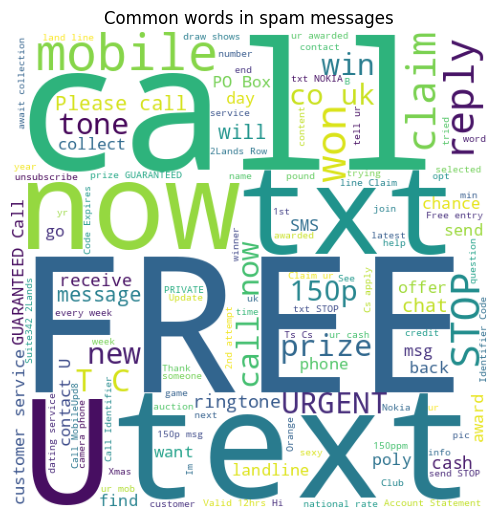

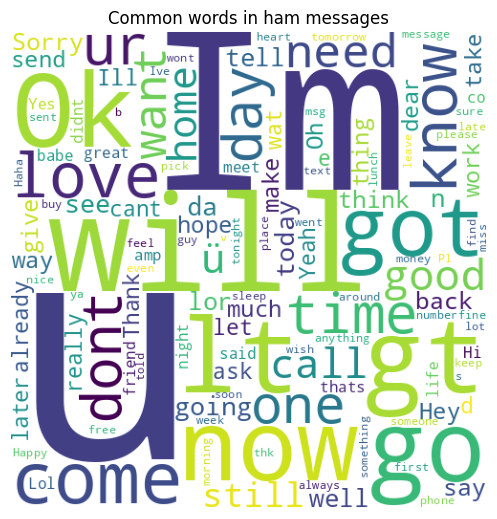

In [20]:
#plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0)
plt.show()
ham_wc = wc.generate(ham)

# plot the world cloud for spam
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(ham_wc)
plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0)
plt.show()

### **It seems that ham messages contain lot's of abbreviation and informal words. Spams tend to contain mostly free, mobile, cole, text**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = X_encoded
y = df['Category']

In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [24]:
# Reshape the data for the model
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

**Training the Model using Naive Bayes Classifier**

In [25]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)


 **Predict the test set results**

In [26]:
y_pred = spam_detect_model.predict(X_test)

**Evaluate the model**

In [27]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [28]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       967
           1       0.00      0.00      0.00       148

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.81      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[967,   0],
       [148,   0]])

Visualizing the confusion matrix

<Axes: >

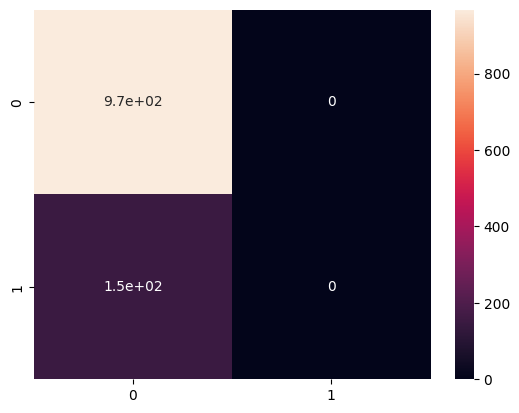

In [30]:
sns.heatmap(cm,annot=True)

In [31]:
accuracy_score(y_test,y_pred)

0.8672645739910314